In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

## TEST 1 Setup

### Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4;Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.
### At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.

In [ ]:
test_no=1

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

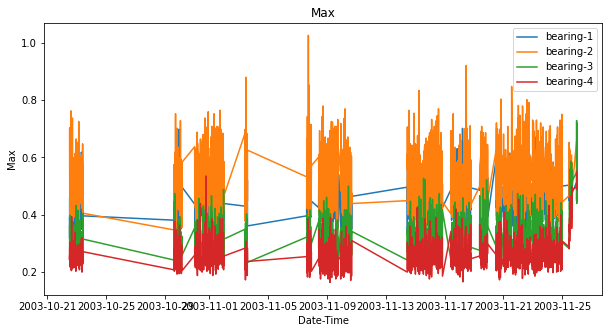

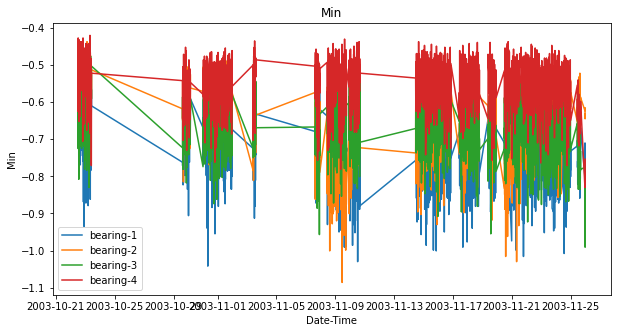

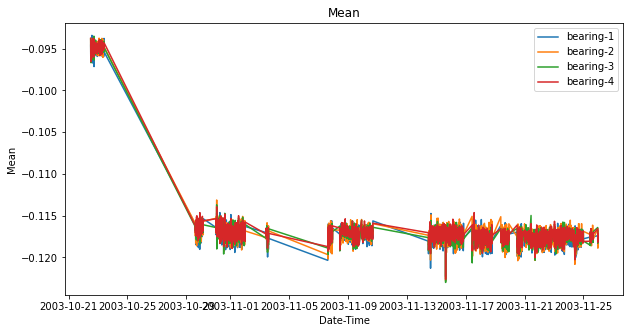

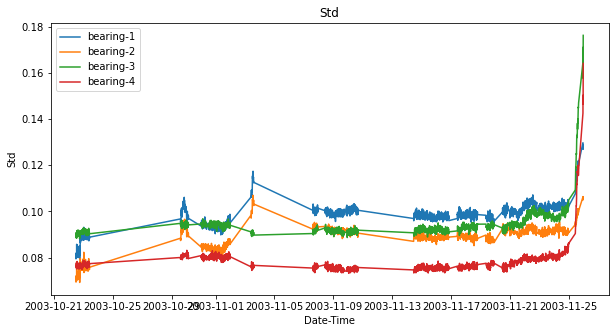

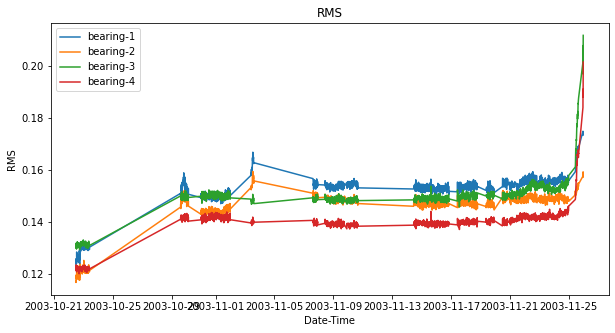

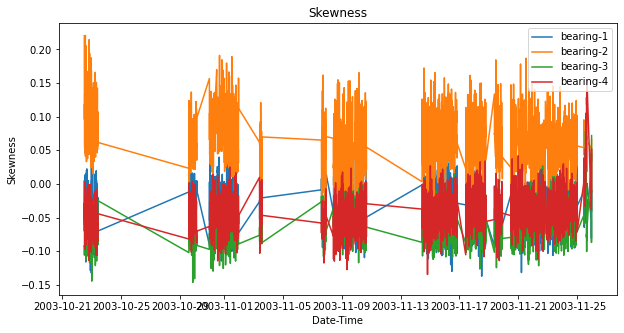

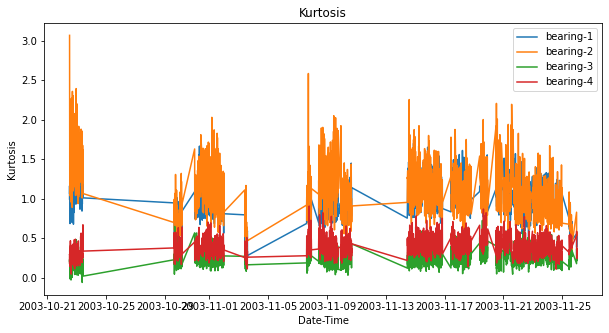

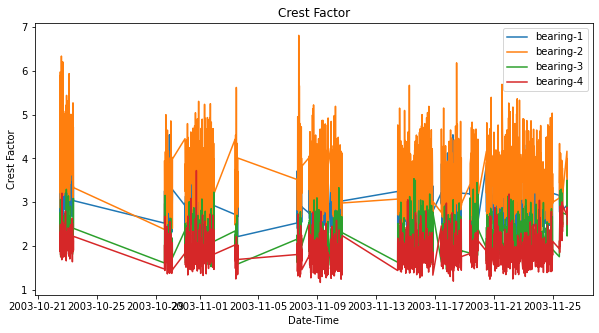

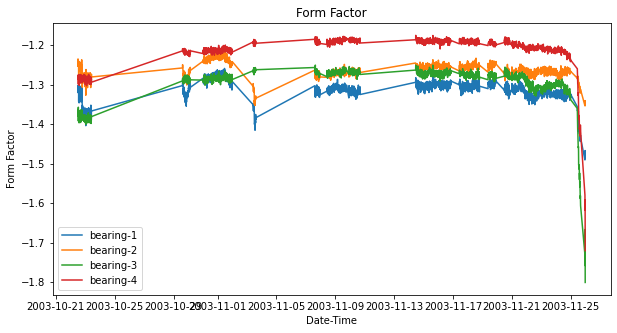

In [ ]:
for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

### Capturing Inner race Fault

In [ ]:
df_irf=df3['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_irf)):
    fault.append('Inner Race')

df_irf['Fault']=fault
df_irf

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\1442353547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.315,-0.598,-0.117176,0.093689,0.150024,-0.066519,0.237738,2.099659,-1.280337,Inner Race
2003-11-21 00:44:00,0.388,-0.627,-0.117639,0.093396,0.150204,-0.051036,0.289413,2.583150,-1.276826,Inner Race
2003-11-21 00:54:00,0.376,-0.725,-0.118024,0.093985,0.150873,-0.058157,0.371994,2.492168,-1.278317,Inner Race
2003-11-21 01:04:00,0.332,-0.757,-0.117134,0.092784,0.149428,-0.040069,0.239665,2.221806,-1.275705,Inner Race
2003-11-21 01:14:00,0.291,-0.625,-0.117235,0.094154,0.150362,-0.066275,0.307553,1.935335,-1.282564,Inner Race
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.305,-0.696,-0.117918,0.100268,0.154783,-0.058312,0.238568,1.970500,-1.312634,Inner Race
2003-11-24 17:47:00,0.269,-0.564,-0.116705,0.099393,0.153292,-0.085474,0.162001,1.754823,-1.313502,Inner Race
2003-11-24 17:57:00,0.286,-0.652,-0.117893,0.100989,0.155232,-0.044501,0.183394,1.842403,-1.316722,Inner Race
2003-11-24 18:07:00,0.322,-0.835,-0.118377,0.101158,0.155710,-0.066844,0.379393,2.067950,-1.315373,Inner Race


In [ ]:
df_irf.to_csv('inner_race_fault.csv',index=False)

### Capturing Roller Element Fault

In [ ]:
df_ref=df4['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_ref)):
    fault.append('Roller Element')

df_ref['Fault']=fault
df_ref

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\1836188734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.261,-0.562,-0.117867,0.076821,0.140690,-0.009869,0.382108,1.855141,-1.193636,Roller Element
2003-11-21 00:44:00,0.295,-0.657,-0.116988,0.076044,0.139530,-0.037429,0.644513,2.114243,-1.192685,Roller Element
2003-11-21 00:54:00,0.269,-0.525,-0.117555,0.076884,0.140464,-0.017772,0.452600,1.915087,-1.194876,Roller Element
2003-11-21 01:04:00,0.220,-0.527,-0.116833,0.075196,0.138940,-0.022964,0.453947,1.583422,-1.189213,Roller Element
2003-11-21 01:14:00,0.327,-0.532,-0.118223,0.077386,0.141297,-0.056806,0.714296,2.314273,-1.195177,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.229,-0.488,-0.118015,0.083851,0.144769,-0.067698,0.233650,1.581825,-1.226706,Roller Element
2003-11-24 17:47:00,0.303,-0.569,-0.117486,0.082563,0.143595,-0.005831,0.369785,2.110106,-1.222223,Roller Element
2003-11-24 17:57:00,0.232,-0.569,-0.116743,0.084937,0.144371,-0.041197,0.247918,1.606971,-1.236654,Roller Element
2003-11-24 18:07:00,0.293,-0.771,-0.117529,0.083075,0.143924,-0.024656,0.533415,2.035792,-1.224588,Roller Element


In [ ]:
df_ref.to_csv('roller_element_fault.csv',index=False)

## Test 2 Setup

Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4. 

At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

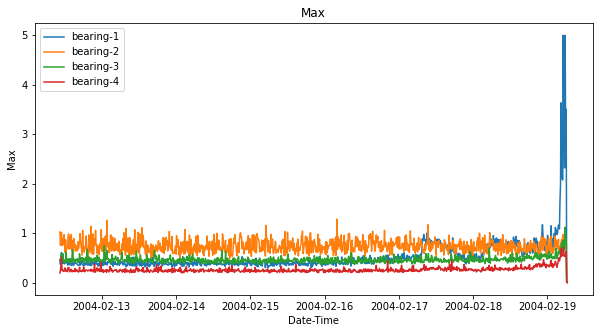

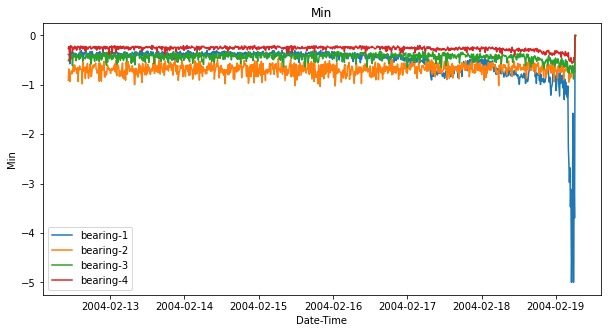

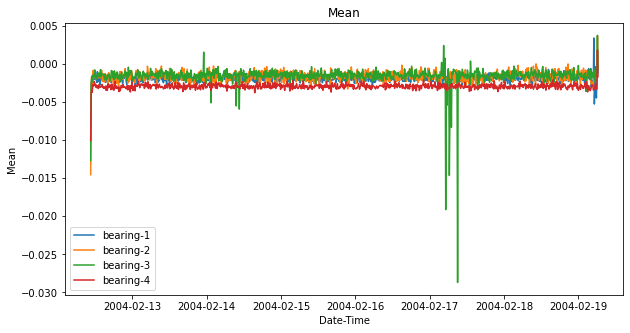

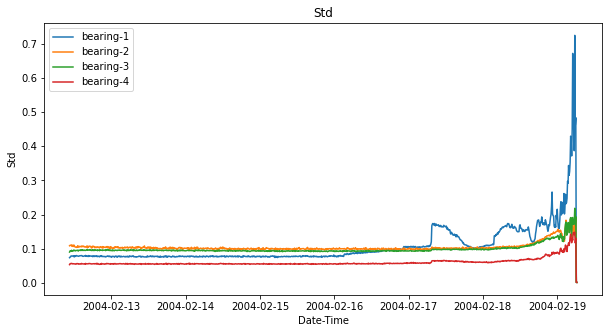

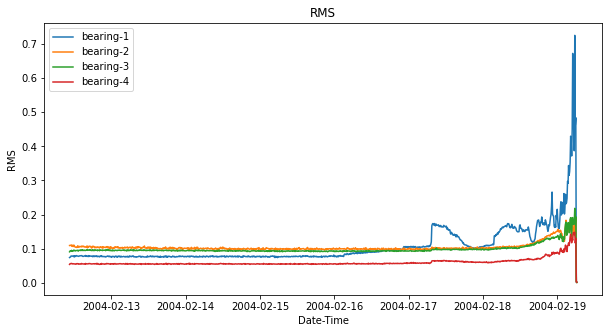

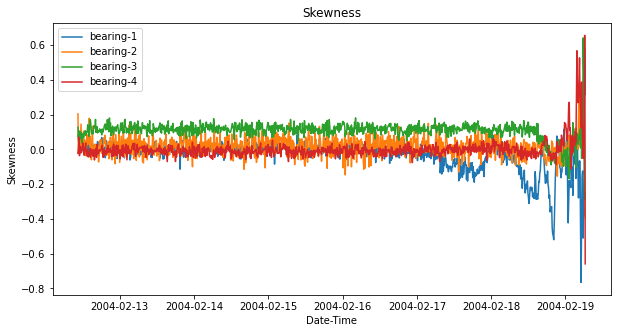

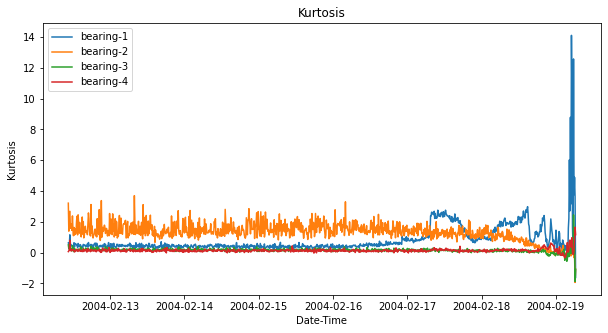

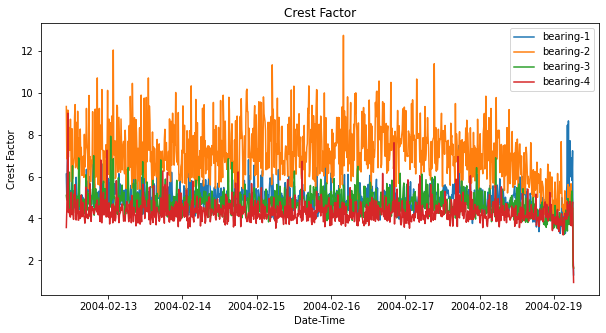

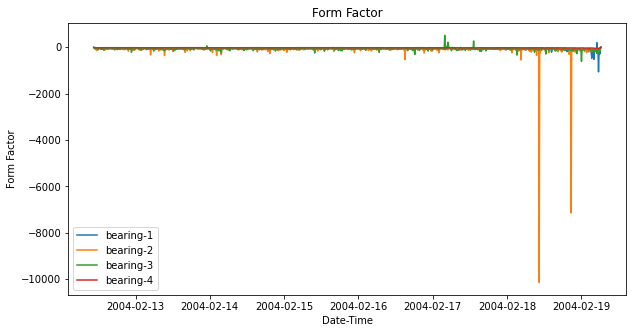

In [ ]:
test_no=2

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

### Capturing Outer Race Fault

In [ ]:
df_orf=df1['2004-02-17 12:32:00':'2004-02-19 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_2.csv',index=False)  
df_orf

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\3318812895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-17 12:32:00,0.789,-0.781,-0.001874,0.162117,0.162124,-0.076375,2.539286,4.866637,-86.515839,Outer Race
2004-02-17 12:42:00,0.803,-0.723,-0.001712,0.155821,0.155826,-0.087399,2.463552,5.153178,-91.001170,Outer Race
2004-02-17 12:52:00,0.879,-0.725,-0.002833,0.156768,0.156790,-0.082349,2.397298,5.606226,-55.341134,Outer Race
2004-02-17 13:02:00,0.784,-0.754,-0.002073,0.154166,0.154177,-0.050836,2.380468,5.085081,-74.391213,Outer Race
2004-02-17 13:12:00,0.854,-0.698,-0.001955,0.155019,0.155028,-0.079743,2.385198,5.508694,-79.314679,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 00:02:00,0.955,-1.118,-0.001586,0.215437,0.215437,-0.080072,1.458276,4.432845,-135.796235,Outer Race
2004-02-19 00:12:00,0.710,-1.021,-0.001834,0.183846,0.183851,-0.146662,0.885198,3.861822,-100.230775,Outer Race
2004-02-19 00:22:00,0.693,-0.728,-0.001688,0.163871,0.163876,0.120602,0.264161,4.228812,-97.072275,Outer Race
2004-02-19 00:32:00,0.647,-0.696,-0.002102,0.158311,0.158321,0.053990,0.326583,4.086625,-75.329810,Outer Race


## Test 3 Setup

Bearing1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing4 – Ch4

At the end of the test-to-failure experiment, outer race failure occurred in bearing 3.

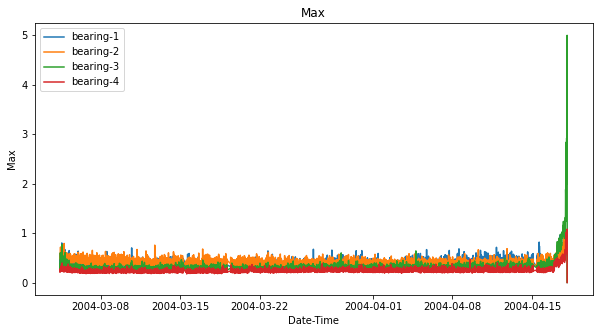

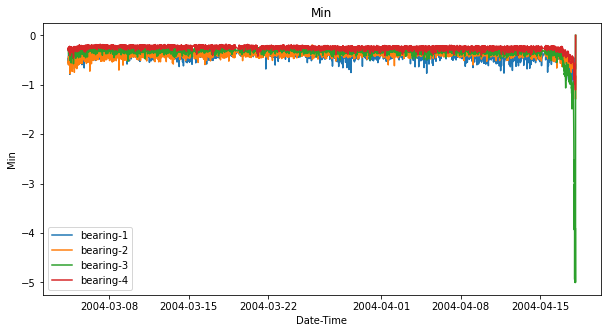

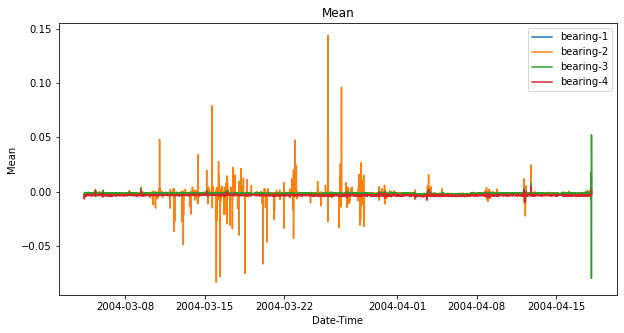

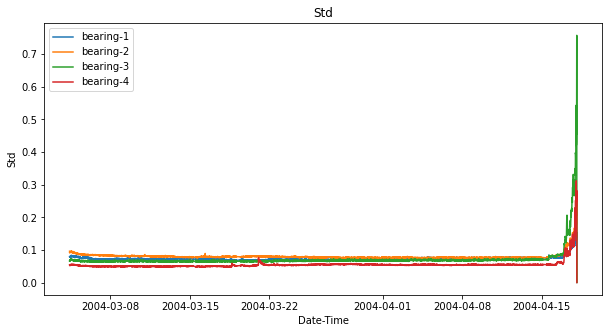

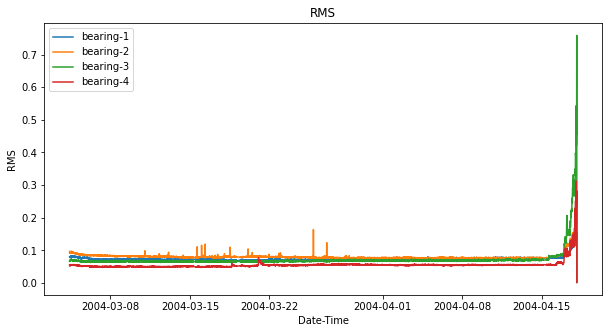

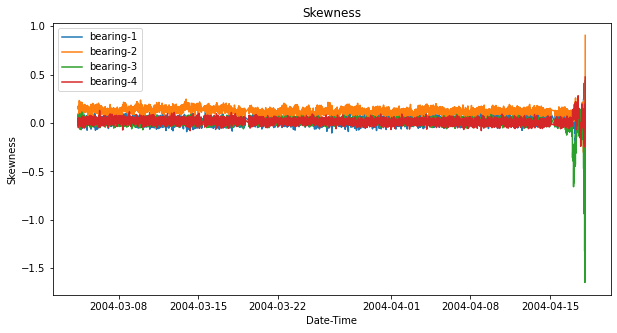

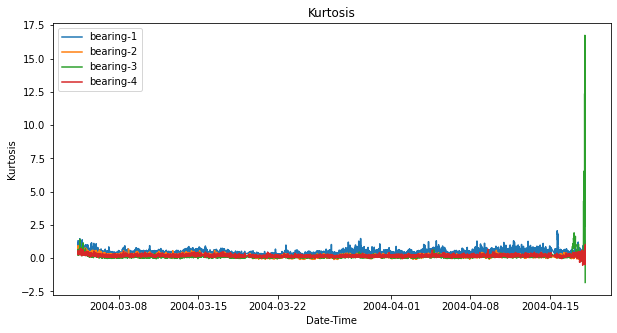

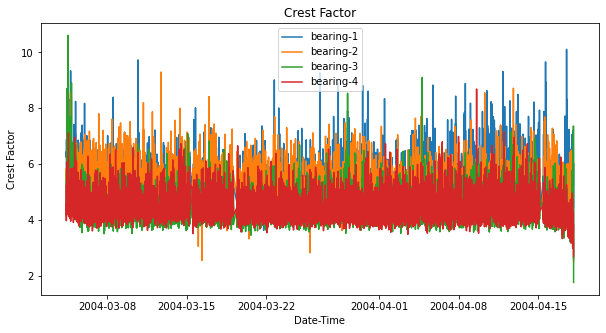

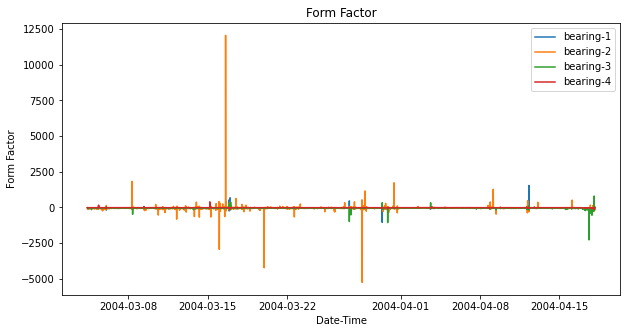

In [ ]:
test_no=3

df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_{}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_{}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

### Capturing Outer race Fault

In [ ]:
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-03-04 09:27:00,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399
2004-03-04 09:32:00,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622
2004-03-04 09:42:00,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544
2004-03-04 09:52:00,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513
2004-03-04 10:02:00,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,3.167,-5.000,0.017613,0.495062,0.495363,-1.648364,16.742241,6.393285,28.124430
2004-04-18 02:12:00,2.378,-3.899,-0.002114,0.454472,0.454466,-0.656841,5.707273,5.232514,-214.967877
2004-04-18 02:22:00,4.346,-5.000,-0.079840,0.584635,0.590047,-0.426006,12.660025,7.365514,-7.390347
2004-04-18 02:32:00,4.998,-5.000,0.052137,0.756990,0.758765,-0.220131,7.058920,6.587018,14.553238


In [ ]:
df_orf=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_3.csv',index=False)  
df_orf

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\1502110747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race


### Capturing Normal Data from all the Bearings 

In [ ]:
Test=[1,2,3]
Bearing_No=[1,2,3,4]

df_normal_bearing = pd.DataFrame()

for test_no in Test:
    for bearing_no in Bearing_No:
        temp = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(bearing_no,test_no),index_col='Unnamed: 0')

        starting = np.floor(len(temp)*.21)
        ending = np.floor(len(temp)*.23)

        start_time = temp.index[starting]
        end_time = temp.index[ending]

        temp = temp[start_time:end_time]
        
        df_normal_bearing=df_normal_bearing.append(temp)

fault=[]
for i in range (0,len(df_normal_bearing)):
    fault.append('Normal')

df_normal_bearing['Fault']=fault

df_normal_bearing.to_csv('Normal_Bearing.csv',index=False)  

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\2106451950.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time = temp.index[starting]
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\2106451950.py:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  end_time = temp.index[ending]
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\2106451950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_normal_bearing=df_normal_bearing.append(temp)
C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_4596\2106451950.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  st

In [ ]:
df_normal_bearing


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-01 14:01:00,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
2003-11-01 14:11:00,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2003-11-01 14:21:00,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2003-11-01 14:31:00,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
2003-11-01 14:41:00,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2004-03-14 11:02:00,0.276,-0.244,-0.003381,0.051343,0.051453,0.050065,0.367385,5.364090,-15.216136,Normal
2004-03-14 11:12:00,0.244,-0.295,-0.002698,0.051048,0.051118,-0.017866,0.357546,4.773283,-18.945901,Normal
2004-03-14 11:22:00,0.234,-0.222,-0.003480,0.051675,0.051791,0.039894,0.298893,4.518154,-14.882157,Normal
2004-03-14 11:32:00,0.225,-0.212,-0.003334,0.052118,0.052223,0.005201,0.253224,4.308406,-15.661694,Normal
